In [ ]:
import sys
import os
import pandas as pd

# Add the project root to the Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

# Import the project modules
from src.config import setup_logging
from src.extract import fetch_statsbomb_event_data
from src.viz import create_build_up_plots
from src.transform import transform_to_build_up_events
from src.stats import calculate_build_up_stats

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/gk_distribution.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
events = fetch_statsbomb_event_data()

2025-10-03 12:37:51,604 - src.extract.statsbomb_data - INFO - Fetching StatsBomb event data for Europe - UEFA Euro - 2024 - male
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsbombpy/api_client.py:21: No

In [3]:
list(events.columns)

['50_50',
 'bad_behaviour_card',
 'ball_receipt_outcome',
 'ball_recovery_offensive',
 'ball_recovery_recovery_failure',
 'block_deflection',
 'block_offensive',
 'block_save_block',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_no_touch',
 'dribble_nutmeg',
 'dribble_outcome',
 'dribble_overrun',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_committed_card',
 'foul_committed_offensive',
 'foul_committed_penalty',
 'foul_committed_type',
 'foul_won_advantage',
 'foul_won_defensive',
 'foul_won_penalty',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_penalty_saved_to_post',
 'goalkeeper_position',
 'goalkeeper_punched_out',
 'goalkeeper_shot_saved_off_target',
 'goalkeeper_shot_saved_to_post',
 'goalkeeper_success_in_play',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id'

In [14]:
first_events, chain_events = transform_to_build_up_events(events)

2025-10-03 12:50:58,108 - src.transform.goal_kick_events - INFO - Transforming 187858 records from events data to two phase events.
2025-10-03 12:50:58,250 - src.transform.goal_kick_events - INFO - Filtered 4998 records from events data to goal kick chains.
2025-10-03 12:51:02,246 - src.transform.goal_kick_events - INFO - Transformed 799 records from events data to first events dataframe.
2025-10-03 12:51:02,247 - src.transform.goal_kick_events - INFO - Transformed 282 records from events data to chain events dataframe.


In [8]:
first_events["pass_outcome"].value_counts()

pass_outcome
Incomplete    187
Unknown        25
Out            12
Name: count, dtype: int64

In [15]:
chain_events[chain_events["team"] == "Spain"].head(30)

,match_id,team,player,position,timestamp,possession,type,phase,x,y,end_x,end_y,pass_type,pass_outcome,pass_category
4,3930160,Spain,José Ignacio Fernández Iglesias,Left Center Back,00:10:25.151,107,Pass,1,7.0,39.8,19.0,7.1,Goal Kick,NaN,long
5,3930160,Spain,Marc Cucurella Saseta,Left Back,00:10:31.392,107,Pass,2,33.9,5.3,69.4,8.8,NaN,NaN,long
8,3930160,Spain,José Ignacio Fernández Iglesias,Left Center Back,00:22:20.356,38,Pass,1,6.0,32.5,9.8,6.5,Goal Kick,NaN,short
9,3930160,Spain,Marc Cucurella Saseta,Left Back,00:22:22.724,38,Pass,2,9.8,6.5,8.3,20.9,NaN,NaN,short
10,3930160,Spain,José Ignacio Fernández Iglesias,Left Center Back,00:22:52.371,39,Pass,1,6.0,44.1,6.4,36.1,Goal Kick,NaN,short
11,3930160,Spain,Unai Simón Mendibil,Goalkeeper,00:22:54.261,39,Pass,2,6.4,36.1,80.6,16.9,NaN,Pass Offside,long
58,3930172,Spain,Aymeric Laporte,Left Center Back,00:25:46.262,43,Pass,1,6.0,32.2,5.8,40.2,Goal Kick,NaN,short
59,3930172,Spain,Unai Simón Mendibil,Goalkeeper,00:25:51.121,43,Pass,2,16.8,40.5,36.6,43.5,NaN,NaN,short
118,3930179,Spain,Aymeric Laporte,Left Center Back,00:30:06.750,52,Pass,1,7.0,32.4,3.2,40.8,Goal Kick,NaN,short
119,3930179,Spain,David Raya Martin,Goalkeeper,00:30:09.500,52,Pass,2,7.7,39.2,69.2,13.7,NaN,Pass Offside,long


In [37]:
build_up_stats = calculate_build_up_stats(first_events, chain_events)
build_up_stats.head(30)

2025-10-03 13:23:06,100 - src.stats.build_up - INFO - Calculating statistics for build up.


,team,first_total,first_short,first_long,first_short_pct,first_long_pct,first_completed_short,first_incomplete_short,first_completed_short_pct,first_incomplete_short_pct,...,second_short_pct,second_long_pct,second_completed_short,second_incomplete_short,second_completed_short_pct,second_incomplete_short_pct,second_completed_long,second_incomplete_long,second_completed_long_pct,second_incomplete_long_pct
0,Scotland,27,6,21,22,78,6,0,100,0,...,0,100,0,0,0,0,2,2,50,50
1,Germany,21,15,6,71,29,15,0,100,0,...,33,67,1,0,100,0,1,1,50,50
2,Switzerland,33,20,13,61,39,20,0,100,0,...,43,57,6,0,100,0,5,3,62,38
3,Hungary,19,12,7,63,37,12,0,100,0,...,75,25,3,0,100,0,0,1,0,100
4,Croatia,17,11,6,65,35,11,0,100,0,...,50,50,1,0,100,0,1,0,100,0
5,Spain,51,26,25,51,49,26,0,100,0,...,30,70,3,0,100,0,2,5,29,71
6,Albania,30,7,23,23,77,7,0,100,0,...,50,50,1,0,100,0,1,0,100,0
7,Italy,24,19,5,79,21,19,0,100,0,...,86,14,6,0,100,0,1,0,100,0
8,Denmark,28,11,17,39,61,11,0,100,0,...,80,20,4,0,100,0,0,1,0,100
9,Slovenia,47,14,33,30,70,14,0,100,0,...,50,50,1,0,100,0,1,0,100,0


In [38]:
build_up_stats[build_up_stats["team"] == "Spain"]

,team,first_total,first_short,first_long,first_short_pct,first_long_pct,first_completed_short,first_incomplete_short,first_completed_short_pct,first_incomplete_short_pct,...,second_short_pct,second_long_pct,second_completed_short,second_incomplete_short,second_completed_short_pct,second_incomplete_short_pct,second_completed_long,second_incomplete_long,second_completed_long_pct,second_incomplete_long_pct
5,Spain,51,26,25,51,49,26,0,100,0,...,30,70,3,0,100,0,2,5,29,71


2025-10-03 13:55:31,966 - src.viz.build_up - INFO - Creating build up plots for Spain.


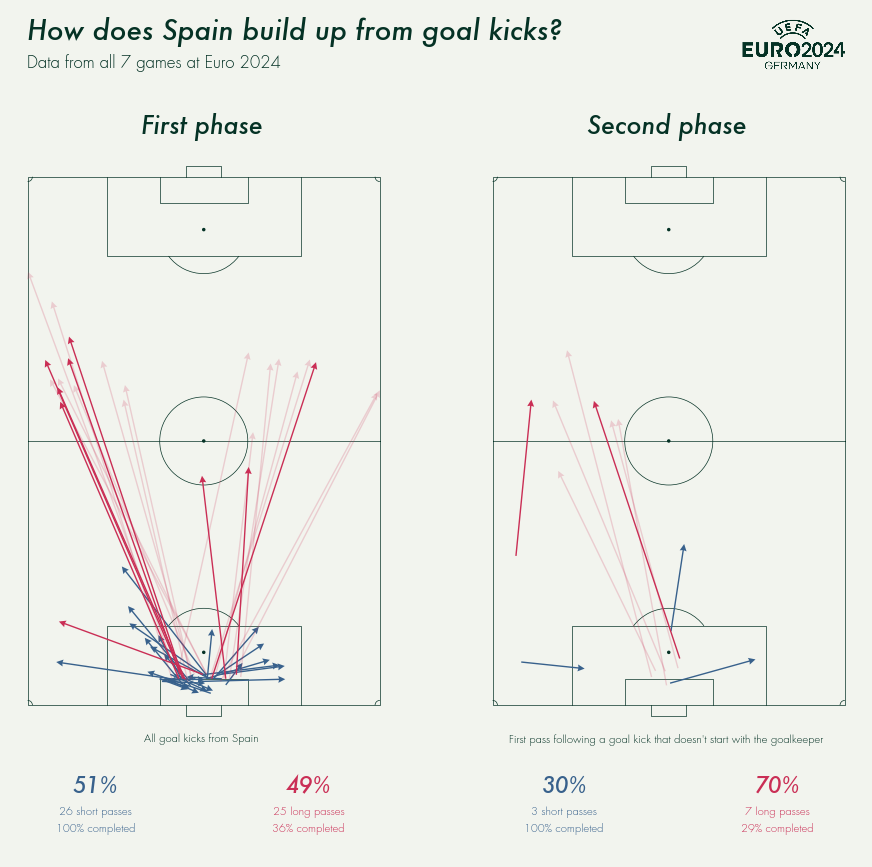

In [93]:
fig = create_build_up_plots("Spain", first_events, chain_events, build_up_stats)